In [1]:
import pandas as pd
dataset = pd.read_csv('mushrooms.csv')

In [2]:
dataset.shape

(8124, 23)

In [3]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (7312, 23)
Unseen Data For Predictions: (812, 23)


In [4]:
from pycaret.classification import *

In [6]:
hxp_clf101 = setup(data = data, target = 'habitat', session_id=123) 

,Description,Value
0,session_id,123
1,Target,habitat
2,Target Type,Multiclass
3,Label Encoded,"d: 0, g: 1, l: 2, m: 3, p: 4, u: 5, w: 6"
4,Original Data,"(7312, 23)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6688,0.8006,0.7586,0.7383,0.6707,0.5769,0.5905,0.0660
lda,Linear Discriminant Analysis,0.6626,0.9200,0.7794,0.8358,0.6836,0.5794,0.6160,0.1140
svm,SVM - Linear Kernel,0.6520,0.0000,0.6367,0.7039,0.6407,0.5378,0.5533,0.7810
ridge,Ridge Classifier,0.6473,0.0000,0.6517,0.6380,0.6390,0.5277,0.5292,0.0300
lr,Logistic Regression,0.6401,0.9250,0.6238,0.6337,0.6347,0.5182,0.5191,2.0870
gbc,Gradient Boosting Classifier,0.6069,0.9154,0.5829,0.6048,0.6047,0.4750,0.4754,4.6310
knn,K Neighbors Classifier,0.5981,0.8819,0.5736,0.5768,0.5848,0.4568,0.4584,0.2600
nb,Naive Bayes,0.5883,0.9030,0.7523,0.8439,0.6084,0.4986,0.5567,0.0290
ada,Ada Boost Classifier,0.5336,0.6972,0.2490,0.4265,0.4389,0.2909,0.3479,0.2390
xgboost,Extreme Gradient Boosting,0.5326,0.8919,0.4926,0.5336,0.5323,0.3774,0.3777,4.6410


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6523,0.7994,0.7687,0.7552,0.6693,0.5644,0.5787
1,0.6914,0.7972,0.7543,0.6949,0.6493,0.5900,0.6046
2,0.6738,0.7967,0.6904,0.7096,0.6712,0.5749,0.5856
3,0.6816,0.8097,0.7956,0.7473,0.6879,0.5955,0.6060
4,0.6582,0.7840,0.7503,0.7144,0.6562,0.5558,0.5645
5,0.6562,0.8013,0.7645,0.7605,0.6776,0.5692,0.5832
6,0.6914,0.8227,0.8029,0.7861,0.7100,0.6125,0.6257
7,0.6836,0.8213,0.7942,0.7960,0.7011,0.6058,0.6238
8,0.6595,0.7818,0.7348,0.6790,0.6243,0.5528,0.5700
9,0.6399,0.7919,0.7302,0.7406,0.6602,0.5477,0.5626


In [10]:
print(qda)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [11]:
tuned_qda = tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6543,0.9144,0.7978,0.8082,0.6728,0.5735,0.5974
1,0.6953,0.9295,0.8183,0.8042,0.7093,0.6188,0.6360
2,0.6562,0.9177,0.8010,0.8073,0.6762,0.5763,0.6002
3,0.6680,0.9211,0.8082,0.8154,0.6866,0.5899,0.6130
4,0.6289,0.9021,0.7893,0.8059,0.6451,0.5465,0.5739
5,0.6641,0.9220,0.8025,0.8077,0.6857,0.5849,0.6077
6,0.6562,0.9189,0.7957,0.7881,0.6756,0.5751,0.5959
7,0.6875,0.9200,0.8233,0.8241,0.7049,0.6132,0.6357
8,0.6595,0.9209,0.8020,0.8107,0.6716,0.5789,0.6023
9,0.6341,0.9111,0.7841,0.7842,0.6518,0.5497,0.5734


In [12]:
print(tuned_qda)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)


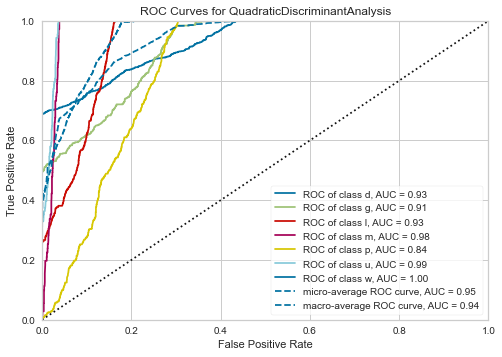

In [13]:
plot_model(tuned_qda, plot = 'auc')

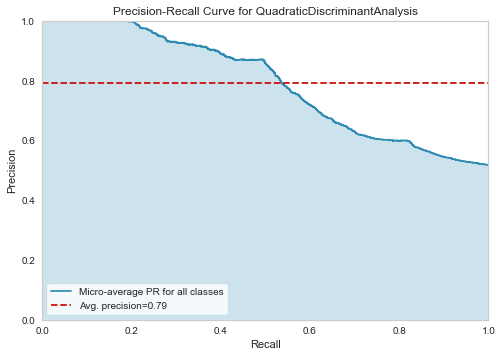

In [14]:
plot_model(tuned_qda, plot = 'pr')

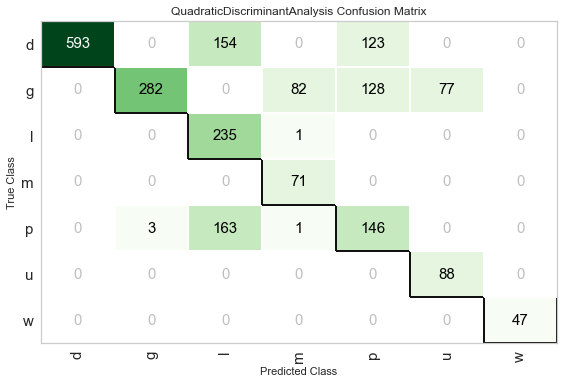

In [17]:
plot_model(tuned_qda, plot = 'confusion_matrix')

In [18]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
predict_model(tuned_qda);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.6664,0.9176,0.8056,0.8090,0.6852,0.5832,0.6055


In [21]:
final_qda = finalize_model(tuned_qda)

In [22]:
print(final_qda)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)


In [24]:
predict_model(final_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.6673,0.9228,0.8065,0.8094,0.6860,0.5843,0.6066


,class_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,d,d,0.9144
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,g,p,0.9171
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,p,p,0.8903
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,g,g,1.0000
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,d,l,0.7990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,p,p,0.9062
2190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,d,p,0.9304
2191,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,d,p,0.9056
2192,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,d,d,1.0000


In [23]:
unseen_predictions = predict_model(final_qda, data = data_unseen)
unseen_predictions.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Label,Score
0,e,x,y,y,t,a,f,c,b,n,...,w,p,w,o,p,k,n,g,m,0.9998
1,e,b,y,w,t,l,f,c,b,n,...,w,p,w,o,p,n,s,m,m,0.9997
2,e,x,y,y,t,a,f,c,b,n,...,w,p,w,o,p,k,s,m,m,0.9995
3,p,x,y,w,t,p,f,c,n,k,...,w,p,w,o,p,n,v,u,u,0.9991
4,p,x,y,w,t,p,f,c,n,n,...,w,p,w,o,p,n,s,u,u,0.9985


In [25]:
save_model(final_qda, 'Final QDA Model 02May2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='habitat',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='habitat')),
                 ('fix_perfect', Remove_100(target='habitat')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'),